In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Fungsi untuk menambahkan klaster dengan warna berbeda ---
def add_cluster_edges(graph, cluster, color):
    """Tambahkan edges antar anggota cluster dengan warna tertentu"""
    for i in range(len(cluster)):
        for j in range(i+1, len(cluster)):
            graph.add_edge(cluster[i], cluster[j], color=color)

# --- Buat graph dan nodes ---
G = nx.Graph()

mahasiswa = [
"Madina", "Maria", "Adinda", "Aquina", "Alimun", "Hizkia", "Raveena",
"Ophyng", "Aisyah", "Febriani", "Amelia", "Via", "Fanny", "Naia",
"Alfani", "Diah", "Kenzy", "Angel", "Maulida", "Izzati", "Auliya",
"Carissa", "Diva", "Erik", "Maya", "Dany", "Gendis", "Wildan", "Esthi",
"Naufal", "Laudya", "Adrian", "Selvy", "Hafiyyan", "Indra", "Yuniar",
"Kiky", "Sofia", "Varid", "Gaitsa"]
G.add_nodes_from(mahasiswa)

# --- Klaster pertemanan ---
# Misal beberapa klaster
akamsi = ["Via", "Esthi", "Indra", "Madina", "Maulida", "Kiky", "Diva"]
jabodetabek = ["Sofia", "Maria", "Fanny", "Gaitsa", "Aisyah", "Hizkia"]
platP = ["Angel", "Selvy", "Amelia"]
platS = ["Naia", "Izzati", "Varid", "Kiky"]
platM = ["Dany", "Alimun", "Kenzy", "Erik"]
platN = ["Alfani", "Diah", "Naufal"]
platAx = ["Adrian", "Selvy", "Fanny", "Gaitsa"]
sekos = ["Aisyah", "Naia", "Maria", "Angel", "Laudya", "Adrian", "Ophyng"]
himasada = ["Dany", "Esthi", "Naia", "Via", "Madina", "Alfani", "Maulida", "Febriani"]
BEMfakultas = ["Hafiyyan", "Varid", "Carissa", "Raveena", "Wildan"]
warkopbening = ["Wildan", "Dany", "Izzati", "Erik", "Hafiyyan", "Diah", "Kenzy"]
skincaredanmakeup = ["Hizkia", "Kiky", "Sofia", "Maria", "Yuniar"]
makanbareng = ["Ophyng", "Varid", "Gaitsa", "Carissa", "Diva", "Aquina", "Sofia"]
nontonfilm = ["Febriani", "laudya", "Naufal", "Adinda", "Auliya", "Gendis", "Maya", "Adrian"]
UKM = ["Maria", "Ophyng"]
kerja = ["Varid", "Wildan"]
Panitia = ["Ophyng", "Maria", "Hizkia", "Sofia", "Via", "Esthi", "Carissa", "Madina", "Varid", "Maulida", "Naufal",
           "Selvy", "Dany", "Gaitsa", "Fanny", "Izzati", "Naia"]

# Warna klaster
clusters = [
    (akamsi, "red"),
    (jabodetabek, "blue"),
    (platP, "green"),
    (platS, "purple"),
    (platM, "orange"),
    (platN, "brown"),
    (platAx, "pink"),
    (sekos, "cyan"),
    (himasada, "magenta"),
    (BEMfakultas, "yellow"),
    (warkopbening, "grey"),
    (skincaredanmakeup, "black"),
    (makanbareng, "lightgreen"),
    (nontonfilm, "darkblue"),
    (UKM, "maroon"),
    (kerja, "teal"),
    (Panitia, "lightgrey")
]

# Tambahkan edges sesuai klaster
for cluster, color in clusters:
    add_cluster_edges(G, cluster, color)

# --- Analisis ---
# 1) Orang dengan konektivitas paling banyak (degree)
degree_dict = dict(G.degree())
top3 = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 orang dengan konektivitas terbanyak:", top3)

# 2) Pasangan yang paling jauh koneksinya (diameter path)
lengths = dict(nx.all_pairs_shortest_path_length(G))
max_distance = 0
pairs = []
for u in lengths:
    for v, dist in lengths[u].items():
        if dist > max_distance:
            max_distance = dist
            pairs = [(u,v)]
        elif dist == max_distance:
            pairs.append((u,v))
print("Pasangan terjauh koneksinya (jarak {}): {}".format(max_distance, pairs))

# 3a) Bridge person (betweenness centrality)
betweenness = nx.betweenness_centrality(G)
top_bridges = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Bridge person (top 5 betweenness):", top_bridges)

# 3b) Bridge person dengan koneksi paling sedikit (degree rendah tapi high betweenness)
low_degree_bridges = sorted(top_bridges, key=lambda x: degree_dict[x[0]])
print("Bridge person dengan koneksi sedikit:", low_degree_bridges)

Top 3 orang dengan konektivitas terbanyak: [('Naufal', 25), ('Dany', 24), ('Naia', 23)]
Pasangan terjauh koneksinya (jarak 3): [('Adinda', 'Alimun'), ('Adinda', 'Kenzy'), ('Adinda', 'Erik'), ('Adinda', 'Wildan'), ('Adinda', 'Hafiyyan'), ('Adinda', 'Indra'), ('Adinda', 'Kiky'), ('Adinda', 'Diva'), ('Adinda', 'Aquina'), ('Adinda', 'Yuniar'), ('Adinda', 'Raveena'), ('Adinda', 'Amelia'), ('Aquina', 'Alfani'), ('Aquina', 'Febriani'), ('Aquina', 'Amelia'), ('Aquina', 'laudya'), ('Aquina', 'Adinda'), ('Aquina', 'Auliya'), ('Aquina', 'Gendis'), ('Aquina', 'Maya'), ('Aquina', 'Diah'), ('Aquina', 'Alimun'), ('Aquina', 'Kenzy'), ('Aquina', 'Erik'), ('Alimun', 'Indra'), ('Alimun', 'Kiky'), ('Alimun', 'Diva'), ('Alimun', 'Aisyah'), ('Alimun', 'Angel'), ('Alimun', 'Laudya'), ('Alimun', 'Adrian'), ('Alimun', 'laudya'), ('Alimun', 'Adinda'), ('Alimun', 'Auliya'), ('Alimun', 'Gendis'), ('Alimun', 'Maya'), ('Alimun', 'Raveena'), ('Alimun', 'Aquina'), ('Alimun', 'Yuniar'), ('Alimun', 'Amelia'), ('Raveena

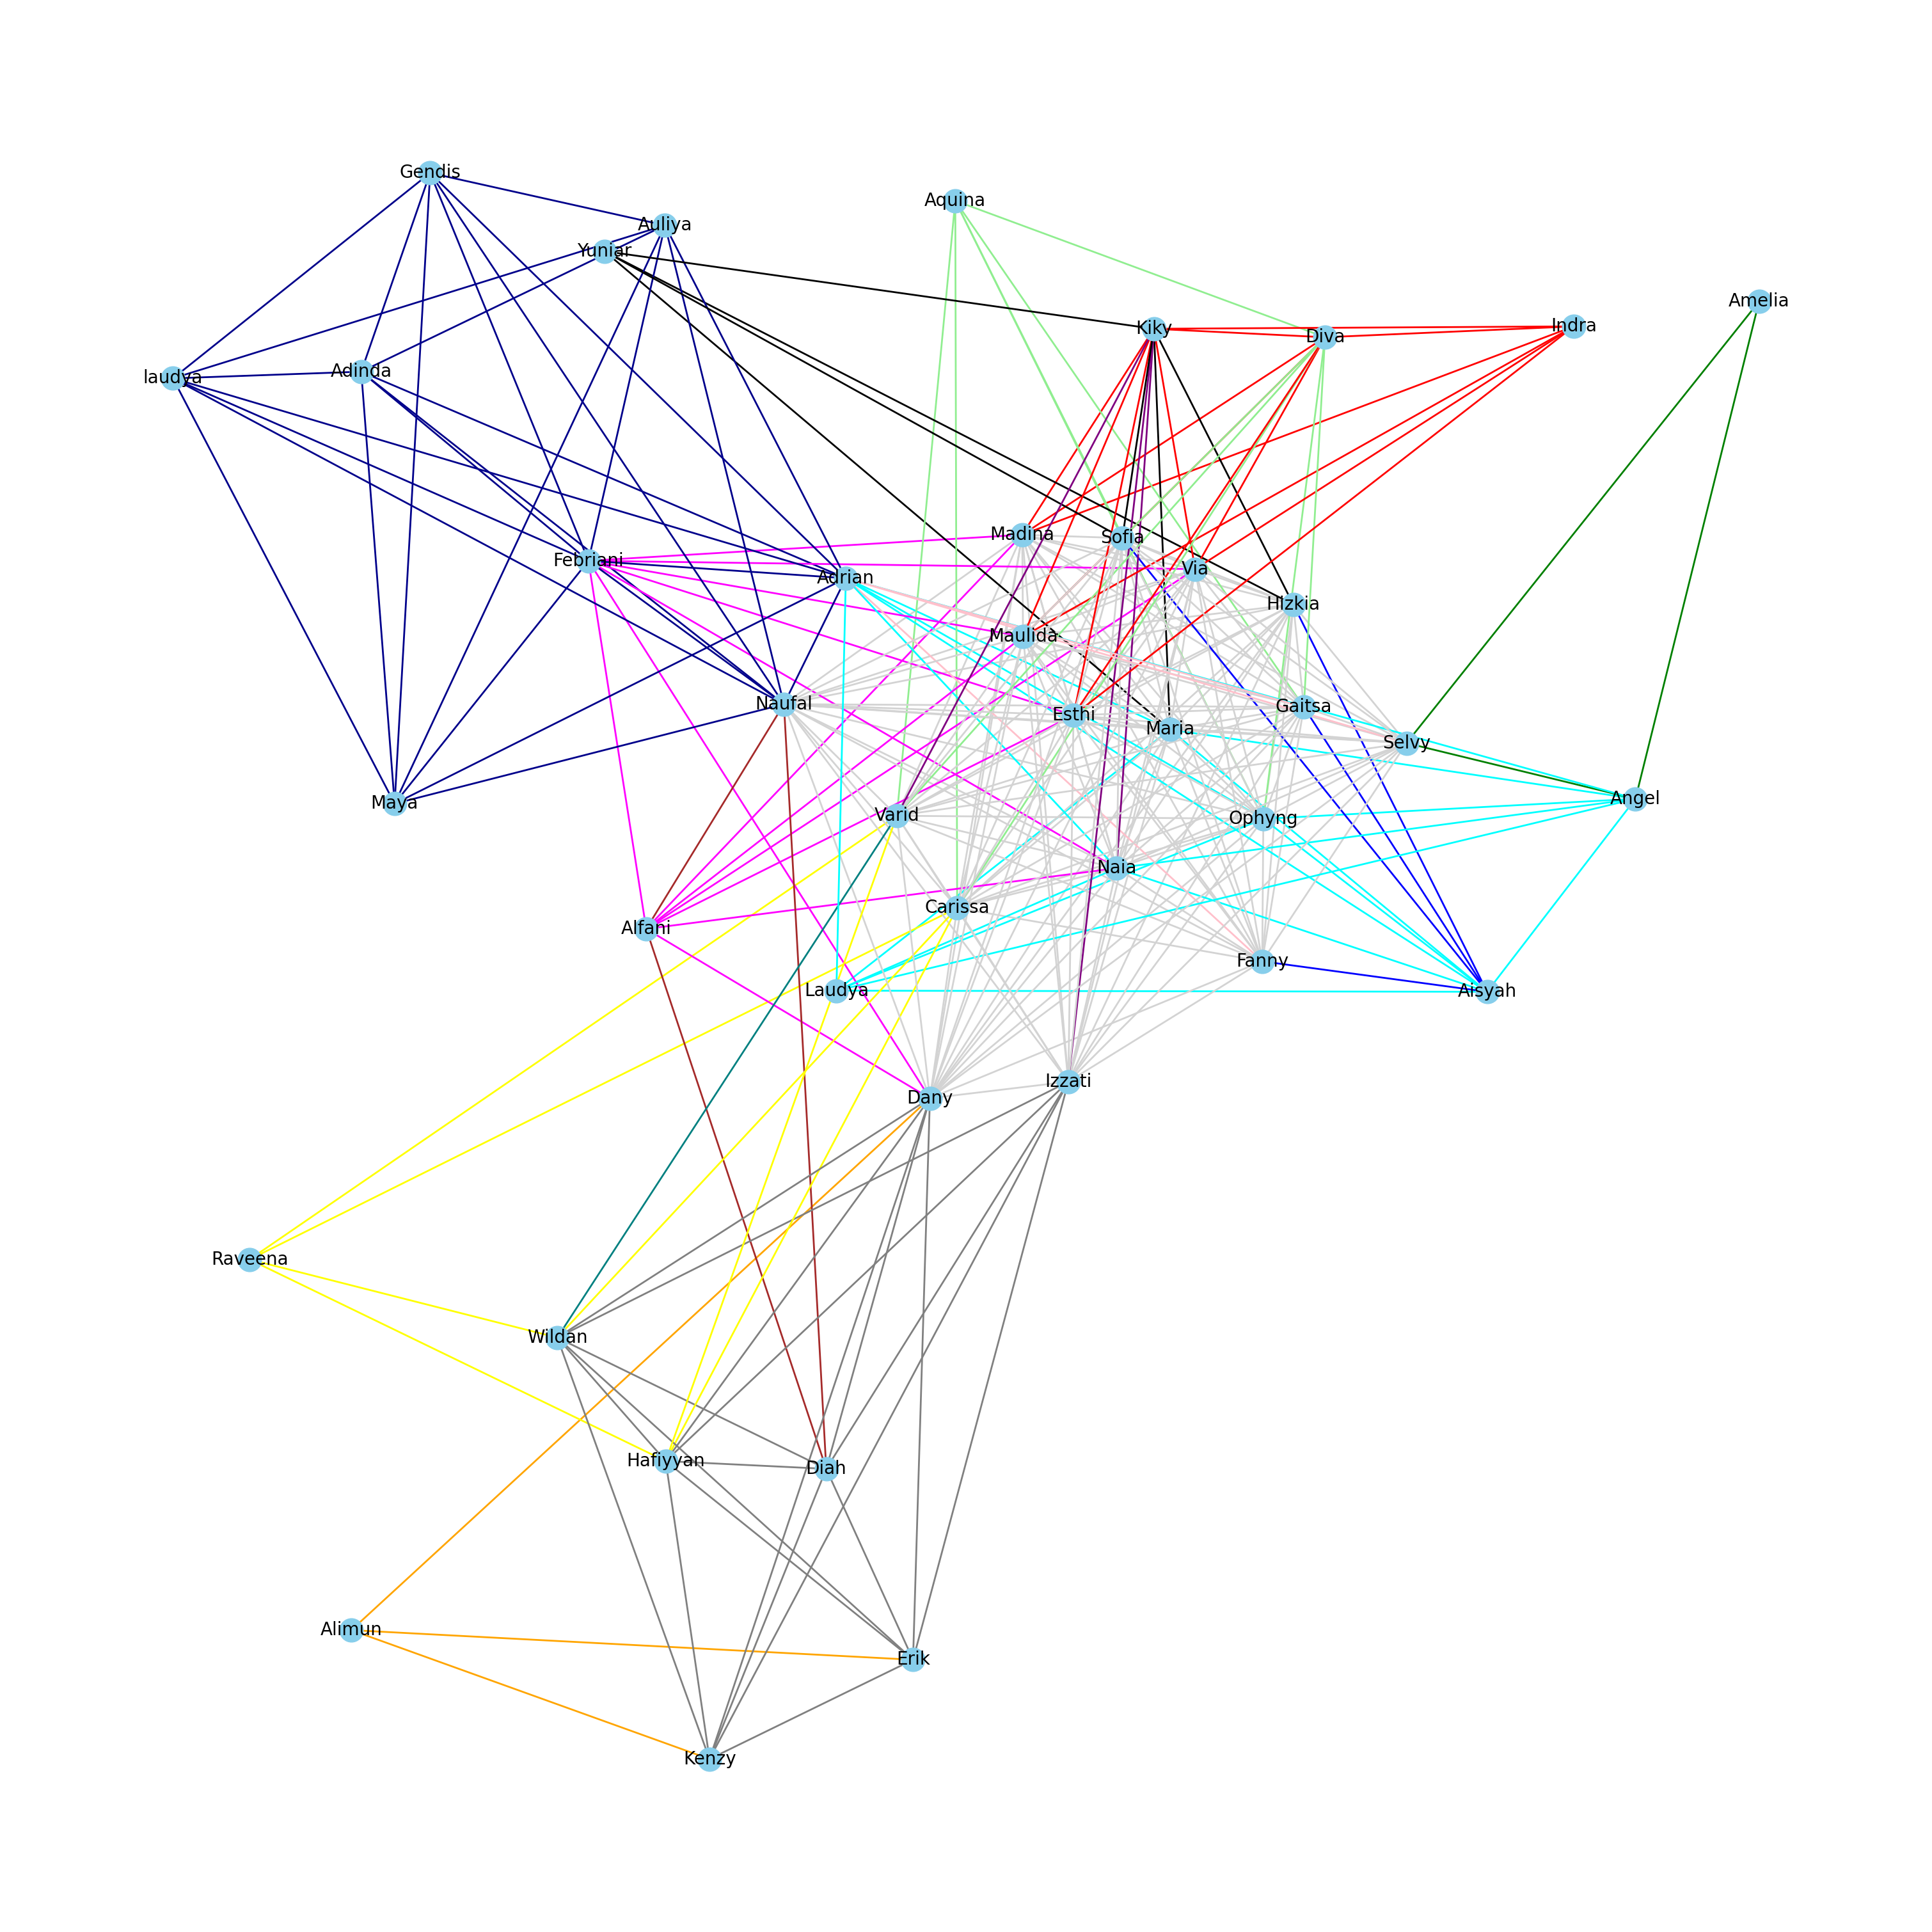

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Fungsi untuk menggambar graph ---
def draw_graph(graph, k_value=0.8, size=(20, 20)):
    # Atur posisi node pakai spring_layout (agar tidak dempet)
    pos = nx.spring_layout(graph, k=k_value, iterations=50)

    # Ambil warna edge (kalau sudah ada di atribut graph)
    edge_colors = [edata['color'] for u, v, edata in graph.edges(data=True)] if len(graph.edges) > 0 else 'black'

    # Gambar
    plt.figure(figsize=size)
    nx.draw(
        graph,
        pos=pos,
        with_labels=True,
        node_size=700,
        node_color='skyblue',
        font_size=20,
        edge_color=edge_colors,
        width=2
    )
    plt.show()

# --- Contoh pemanggilan ---
draw_graph(G, k_value=1.0, size=(30, 30))  # ubah k_value lebih besar -> graph makin renggang


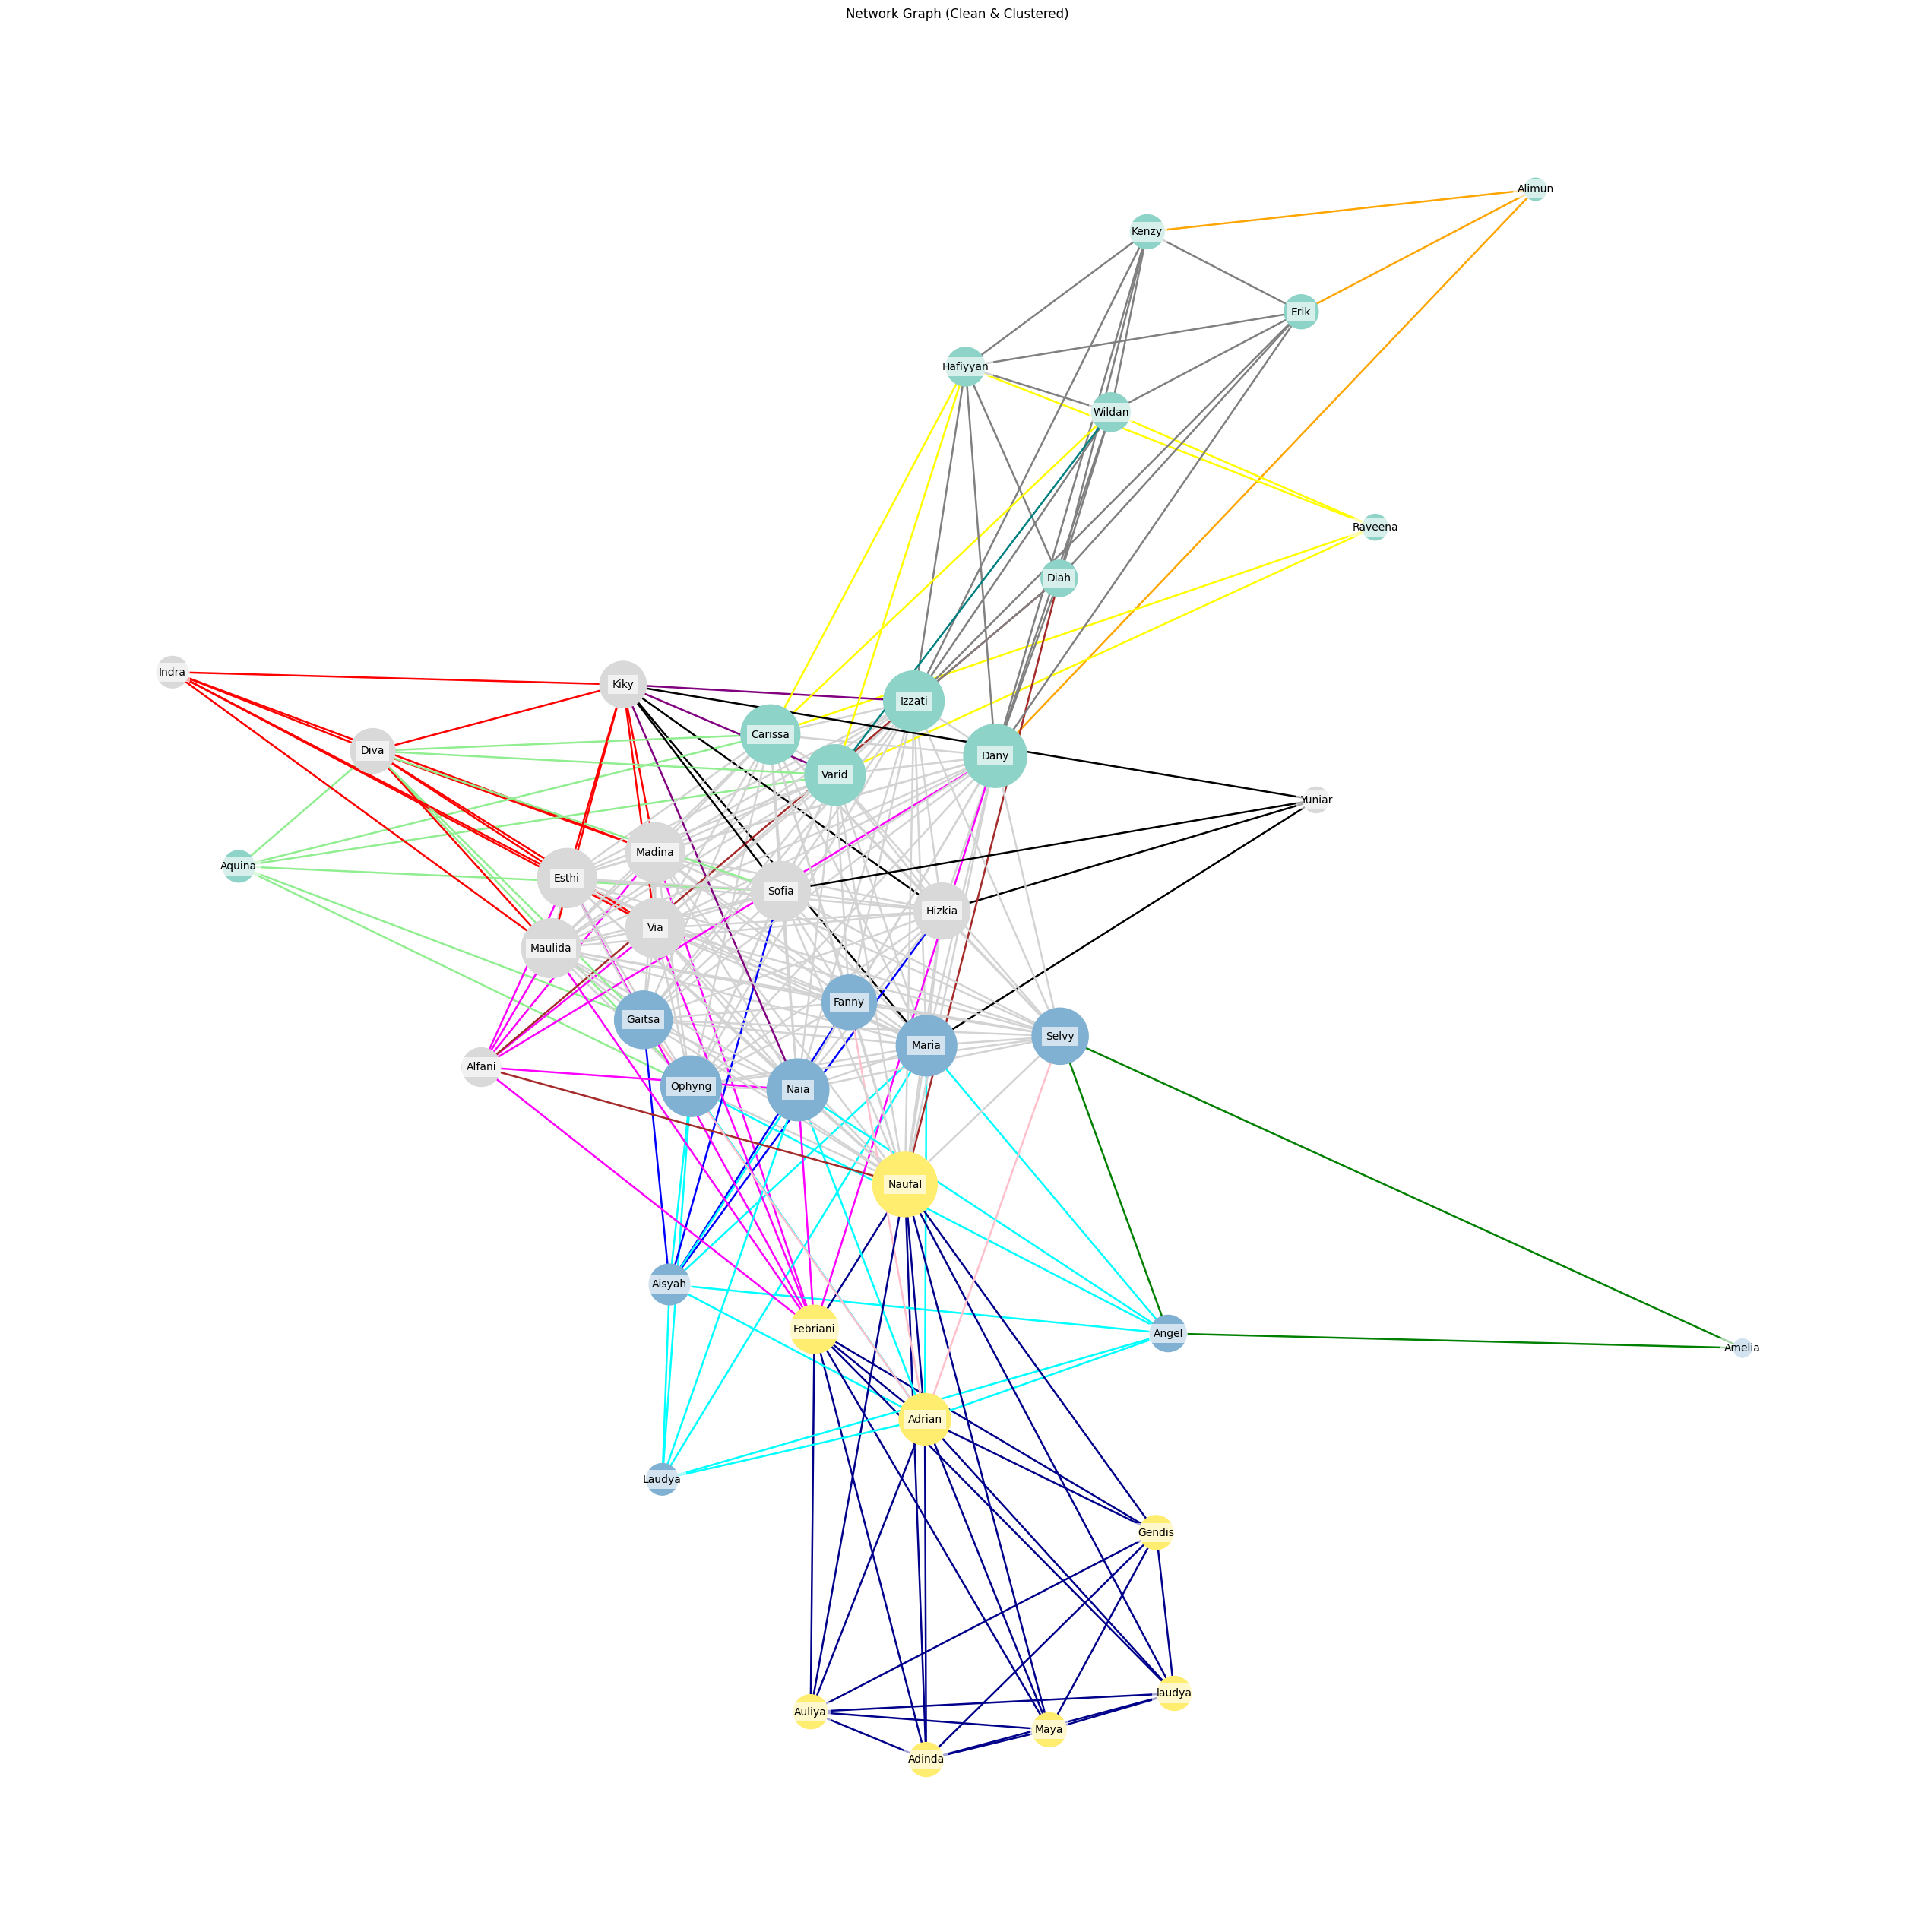

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities

def draw_graph_clean(graph, k_value=0.8, size=(20, 20)):
    # Layout lebih stabil
    pos = nx.spring_layout(graph, k=k_value, iterations=80, seed=42)

    # Community detection
    communities = louvain_communities(graph)
    community_map = {}
    for cid, com in enumerate(communities):
        for node in com:
            community_map[node] = cid
    
    # Assign node colors by community
    node_colors = [community_map[node] for node in graph.nodes()]
    
    # Ukuran node berdasarkan degree
    node_sizes = [graph.degree(n) * 150 for n in graph.nodes()]

    # Edge colors (ambil dari atribut, default black jika tidak ada)
    edge_colors = [edata.get('color', 'black') for _, _, edata in graph.edges(data=True)]

    plt.figure(figsize=size)

    nx.draw(
        graph,
        pos,
        with_labels=False,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.Set3,
        edge_color=edge_colors,
        width=1.8
    )
    
    # Label dibuat lebih rapih
    nx.draw_networkx_labels(
        graph, pos,
        font_size=10,
        font_color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.65)
    )
    
    plt.title("Network Graph (Clean & Clustered)")
    plt.axis('off')
    plt.show()

# Pemanggilan
draw_graph_clean(G, k_value=1.0, size=(25, 25))


In [21]:
from pyvis.network import Network
from IPython.display import IFrame
import networkx as nx
import codecs, os

# --- Fungsi untuk menampilkan graph interaktif ---
def show_interactive_graph(graph, height="800px", width="100%", physics=True, edge_thickness=3):
    net = Network(
        height=height, 
        width=width, 
        notebook=True,
        cdn_resources='in_line'
    )

    # Gunakan physics agar node tidak menumpuk
    if physics:
        net.barnes_hut()
    else:
        net.force_atlas_2based()

    # Tambah node + tooltip degree
    for node in graph.nodes():
        degree = graph.degree(node)
        net.add_node(node, label=node, title=f"{node}<br>Degree: {degree}")

    # Tambah edge dengan warna dan ketebalan
    for u, v, data in graph.edges(data=True):
        color = data.get('color', "black")
        net.add_edge(u, v, color=color, width=edge_thickness)

    # Simpan HTML dengan UTF-8
    html_name = "docs/network_interactive.html"
    net_html = net.generate_html()
    with codecs.open(html_name, "w", "utf-8") as f:
        f.write(net_html)

    return IFrame(html_name, width="100%", height="800px")

# --- Fungsi bantu menambahkan klaster ---
def add_cluster_edges(graph, cluster, color):
    """Tambahkan edges antar anggota cluster dengan warna tertentu"""
    for i in range(len(cluster)):
        for j in range(i+1, len(cluster)):
            graph.add_edge(cluster[i], cluster[j], color=color)


# --- Buat graph dan nodes ---
G = nx.Graph()

mahasiswa = [
    "Madina", "Maria", "Adinda", "Aquina", "Alimun", "Hizkia", "Raveena",
    "Ophyng", "Aisyah", "Febriani", "Amelia", "Via", "Fanny", "Naia",
    "Alfani", "Diah", "Kenzy", "Angel", "Maulida", "Izzati", "Auliya",
    "Carissa", "Diva", "Erik", "Maya", "Dany", "Gendis", "Wildan", "Esthi",
    "Naufal", "Laudya", "Adrian", "Selvy", "Hafiyyan", "Indra", "Yuniar",
    "Kiky", "Sofia", "Varid", "Gaitsa"
]
G.add_nodes_from(mahasiswa)


# --- Daftar klaster dan warnanya ---
clusters = [
    (["Via", "Esthi", "Indra", "Madina", "Maulida", "Kiky", "Diva"], "red"),
    (["Sofia", "Maria", "Fanny", "Gaitsa", "Aisyah", "Hizkia"], "blue"),
    (["Angel", "Selvy", "Amelia"], "green"),
    (["Naia", "Izzati", "Varid", "Kiky"], "purple"),
    (["Dany", "Alimun", "Kenzy", "Erik"], "orange"),
    (["Alfani", "Diah", "Naufal"], "brown"),
    (["Adrian", "Selvy", "Fanny", "Gaitsa"], "pink"),
    (["Aisyah", "Naia", "Maria", "Angel", "Laudya", "Adrian", "Ophyng"], "cyan"),
    (["Dany", "Esthi", "Naia", "Via", "Madina", "Alfani", "Maulida", "Febriani"], "magenta"),
    (["Hafiyyan", "Varid", "Carissa", "Raveena", "Wildan"], "yellow"),
    (["Wildan", "Dany", "Izzati", "Erik", "Hafiyyan", "Diah", "Kenzy"], "grey"),
    (["Hizkia", "Kiky", "Sofia", "Maria", "Yuniar"], "black"),
    (["Ophyng", "Varid", "Gaitsa", "Carissa", "Diva", "Aquina", "Sofia"], "lightgreen"),
    (["Febriani", "Laudya", "Naufal", "Adinda", "Auliya", "Gendis", "Maya", "Adrian"], "darkblue"),
    (["Maria", "Ophyng"], "maroon"),
    (["Varid", "Wildan"], "teal"),
    (["Ophyng", "Maria", "Hizkia", "Sofia", "Via", "Esthi", "Carissa", "Madina",
      "Varid", "Maulida", "Naufal", "Selvy", "Dany", "Gaitsa", "Fanny", "Izzati", "Naia"], "lightgrey")
]

# Tambahkan edges sesuai klaster
for cluster, color in clusters:
    add_cluster_edges(G, cluster, color)


# --- Analisis dasar ---
degree_dict = dict(G.degree())
top3 = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 orang dengan konektivitas terbanyak:", top3)

lengths = dict(nx.all_pairs_shortest_path_length(G))
max_distance = 0
pairs = []
for u in lengths:
    for v, dist in lengths[u].items():
        if dist > max_distance:
            max_distance = dist
            pairs = [(u, v)]
        elif dist == max_distance:
            pairs.append((u, v))
print("Pasangan terjauh koneksinya (jarak {}): {}".format(max_distance, pairs))

betweenness = nx.betweenness_centrality(G)
top_bridges = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Bridge person (top 5 betweenness):", top_bridges)

low_degree_bridges = sorted(top_bridges, key=lambda x: degree_dict[x[0]])
print("Bridge person dengan koneksi sedikit:", low_degree_bridges)


# --- Tampilkan grafik interaktif ---
show_interactive_graph(G, edge_thickness=4)


Top 3 orang dengan konektivitas terbanyak: [('Naufal', 25), ('Dany', 24), ('Naia', 23)]
Pasangan terjauh koneksinya (jarak 3): [('Adinda', 'Alimun'), ('Adinda', 'Kenzy'), ('Adinda', 'Erik'), ('Adinda', 'Wildan'), ('Adinda', 'Hafiyyan'), ('Adinda', 'Indra'), ('Adinda', 'Kiky'), ('Adinda', 'Diva'), ('Adinda', 'Yuniar'), ('Adinda', 'Amelia'), ('Adinda', 'Aquina'), ('Adinda', 'Raveena'), ('Aquina', 'Alfani'), ('Aquina', 'Febriani'), ('Aquina', 'Amelia'), ('Aquina', 'Adinda'), ('Aquina', 'Auliya'), ('Aquina', 'Gendis'), ('Aquina', 'Maya'), ('Aquina', 'Diah'), ('Aquina', 'Alimun'), ('Aquina', 'Kenzy'), ('Aquina', 'Erik'), ('Alimun', 'Indra'), ('Alimun', 'Kiky'), ('Alimun', 'Diva'), ('Alimun', 'Aisyah'), ('Alimun', 'Angel'), ('Alimun', 'Laudya'), ('Alimun', 'Adrian'), ('Alimun', 'Adinda'), ('Alimun', 'Auliya'), ('Alimun', 'Gendis'), ('Alimun', 'Maya'), ('Alimun', 'Raveena'), ('Alimun', 'Aquina'), ('Alimun', 'Yuniar'), ('Alimun', 'Amelia'), ('Raveena', 'Alimun'), ('Raveena', 'Alfani'), ('Ravee

FileNotFoundError: [Errno 2] No such file or directory: 'docs/network_interactive.html'